In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# 平均一天喝幾杯含糖飲料以上未來易得糖尿病?

In [5]:
data=pd.read_csv('LogR_data.csv')

In [6]:
data

,Name,Amount,Result
0,Jack,0,0
1,Amy,1,1
2,John,3,1
3,Anna,2,1
4,Nick,1,0
5,Jocelyn,1,0
6,Bob,0,0
7,Candy,0,1
8,Lily,1,0
9,Grace,0,0


In [7]:
X=data['Amount'].values #自變數
y=data['Result'].values #依變數

In [8]:
X

array([0, 1, 3, 2, 1, 1, 0, 0, 1, 0, 2, 3, 3, 2, 2, 0, 2, 3, 2, 3],
      dtype=int64)

In [9]:
X.shape

(20,)

In [16]:
X=X.reshape(-1,2)

In [17]:
X

array([[0, 1],
       [3, 2],
       [1, 1],
       [0, 0],
       [1, 0],
       [2, 3],
       [3, 2],
       [2, 0],
       [2, 3],
       [2, 3]], dtype=int64)

In [20]:
X.shape

(20, 1)

# $$logit(Odds)=\ln (\frac{p}{1-p}) = w_0+w_1X$$

In [21]:
model=linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [22]:
print('coef', model.coef_)
print('intercept',model.intercept_)

coef [[0.83474635]]
intercept [-1.30199159]


In [23]:
w1=float(model.coef_)
w0=float(model.intercept_)

In [24]:
def sigmoid(x,wo,w1):
    ln_odds=wo+w1*x
    return 1/(1+np.exp(-ln_odds))

# $$S(X)=\frac{1}{1+e^{-X}}$$


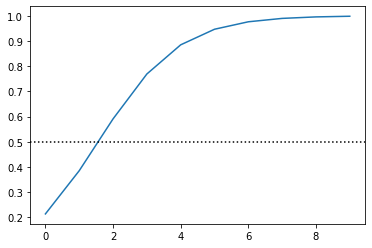

In [25]:
x=np.arange(0,10,1)
s_x=sigmoid(x,w0,w1)
plt.plot(x,s_x)
plt.axhline(y=0.5, ls='dotted', color='k')

In [26]:
model.predict([[0],[1],[2],[3]])

array([0, 0, 1, 1], dtype=int64)

In [27]:
X

array([[0],
       [1],
       [3],
       [2],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [2],
       [3],
       [3],
       [2],
       [2],
       [0],
       [2],
       [3],
       [2],
       [3]], dtype=int64)

In [28]:
model.predict_proba(X)

array([[0.78616997, 0.21383003],
       [0.61473154, 0.38526846],
       [0.23107565, 0.76892435],
       [0.40914498, 0.59085502],
       [0.61473154, 0.38526846],
       [0.61473154, 0.38526846],
       [0.78616997, 0.21383003],
       [0.78616997, 0.21383003],
       [0.61473154, 0.38526846],
       [0.78616997, 0.21383003],
       [0.40914498, 0.59085502],
       [0.23107565, 0.76892435],
       [0.23107565, 0.76892435],
       [0.40914498, 0.59085502],
       [0.40914498, 0.59085502],
       [0.78616997, 0.21383003],
       [0.40914498, 0.59085502],
       [0.23107565, 0.76892435],
       [0.40914498, 0.59085502],
       [0.23107565, 0.76892435]])

In [29]:
model.score(X,y)

0.75

#  多元分類

In [34]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [39]:
iris=datasets.load_iris()

In [40]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [37]:
X=iris.data
y=iris.target

In [38]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [42]:
model=linear_model.LogisticRegression()

In [48]:
model.fit(X_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
model.predict(X_test)

array([0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2,
       0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       2])

In [45]:
model.predict_proba(X_test)

array([[9.63524378e-01, 3.64754912e-02, 1.30460228e-07],
       [9.55302685e-01, 4.46970382e-02, 2.77089255e-07],
       [9.50386249e-01, 4.96133250e-02, 4.25696274e-07],
       [9.71739790e-01, 2.82600746e-02, 1.35255446e-07],
       [2.29840696e-02, 8.92569733e-01, 8.44461974e-02],
       [7.57427844e-04, 3.32915134e-01, 6.66327438e-01],
       [1.21802837e-02, 7.20450096e-01, 2.67369621e-01],
       [4.06244695e-03, 8.78334060e-01, 1.17603493e-01],
       [9.62952163e-01, 3.70476883e-02, 1.48395728e-07],
       [1.29071634e-04, 1.97374106e-01, 8.02496822e-01],
       [9.24409714e-01, 7.55897785e-02, 5.07563946e-07],
       [2.25565792e-07, 7.96712789e-03, 9.92032647e-01],
       [7.15020069e-02, 9.15069113e-01, 1.34288802e-02],
       [9.93239309e-01, 6.76067989e-03, 1.15903485e-08],
       [9.64988092e-01, 3.50117257e-02, 1.81910019e-07],
       [9.81516162e-01, 1.84837985e-02, 3.96972372e-08],
       [9.77888275e-01, 2.21116374e-02, 8.77566677e-08],
       [1.41794749e-04, 1.43036

In [46]:
model.score(X_train,y_train)

0.9809523809523809

In [47]:
model.score(X_test,y_test)

0.9777777777777777